# Project 3: Predict Bike Rental Usage (Regression)

* The objective is to predict bike rental usage based on inputs such as temperature, humidity, wind speed, etc.
* __Data Reference:__
  * The Hadi Fanaee-T
  * LIAAD, University of Porto

## Import the Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Datasets

In [2]:
df = pd.read_csv('bike_sharing_daily.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Cleanup the dataset

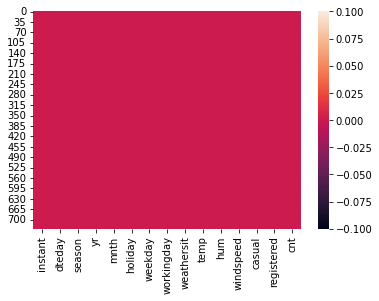

In [5]:
sns.heatmap(df.isnull());

In [6]:
bike = df.drop(labels=['instant', 'casual', 'registered'], axis=1)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [7]:
bike.dteday = pd.to_datetime(bike.dteday, format="%m/%d/%Y")
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [8]:
bike.index = pd.DatetimeIndex(bike.dteday)
bike = bike.drop(labels=['dteday'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


## Visualize the Dataset

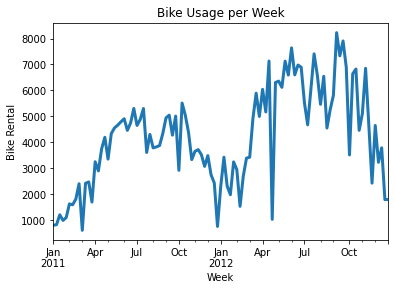

In [9]:
bike['cnt'].asfreq('W').plot(linewidth=3)
plt.title('Bike Usage per Week')
plt.xlabel('Week')
plt.ylabel('Bike Rental');

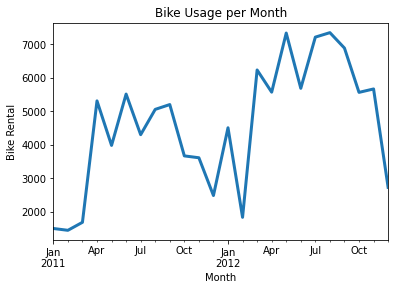

In [10]:
bike['cnt'].asfreq('M').plot(linewidth=3)
plt.title('Bike Usage per Month')
plt.xlabel('Month')
plt.ylabel('Bike Rental');

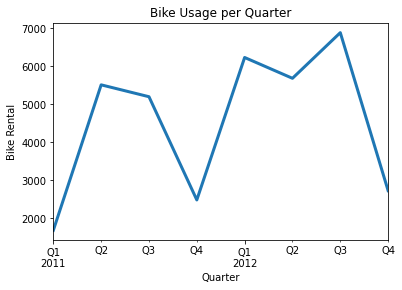

In [11]:
bike['cnt'].asfreq('Q').plot(linewidth=3)
plt.title('Bike Usage per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Bike Rental');

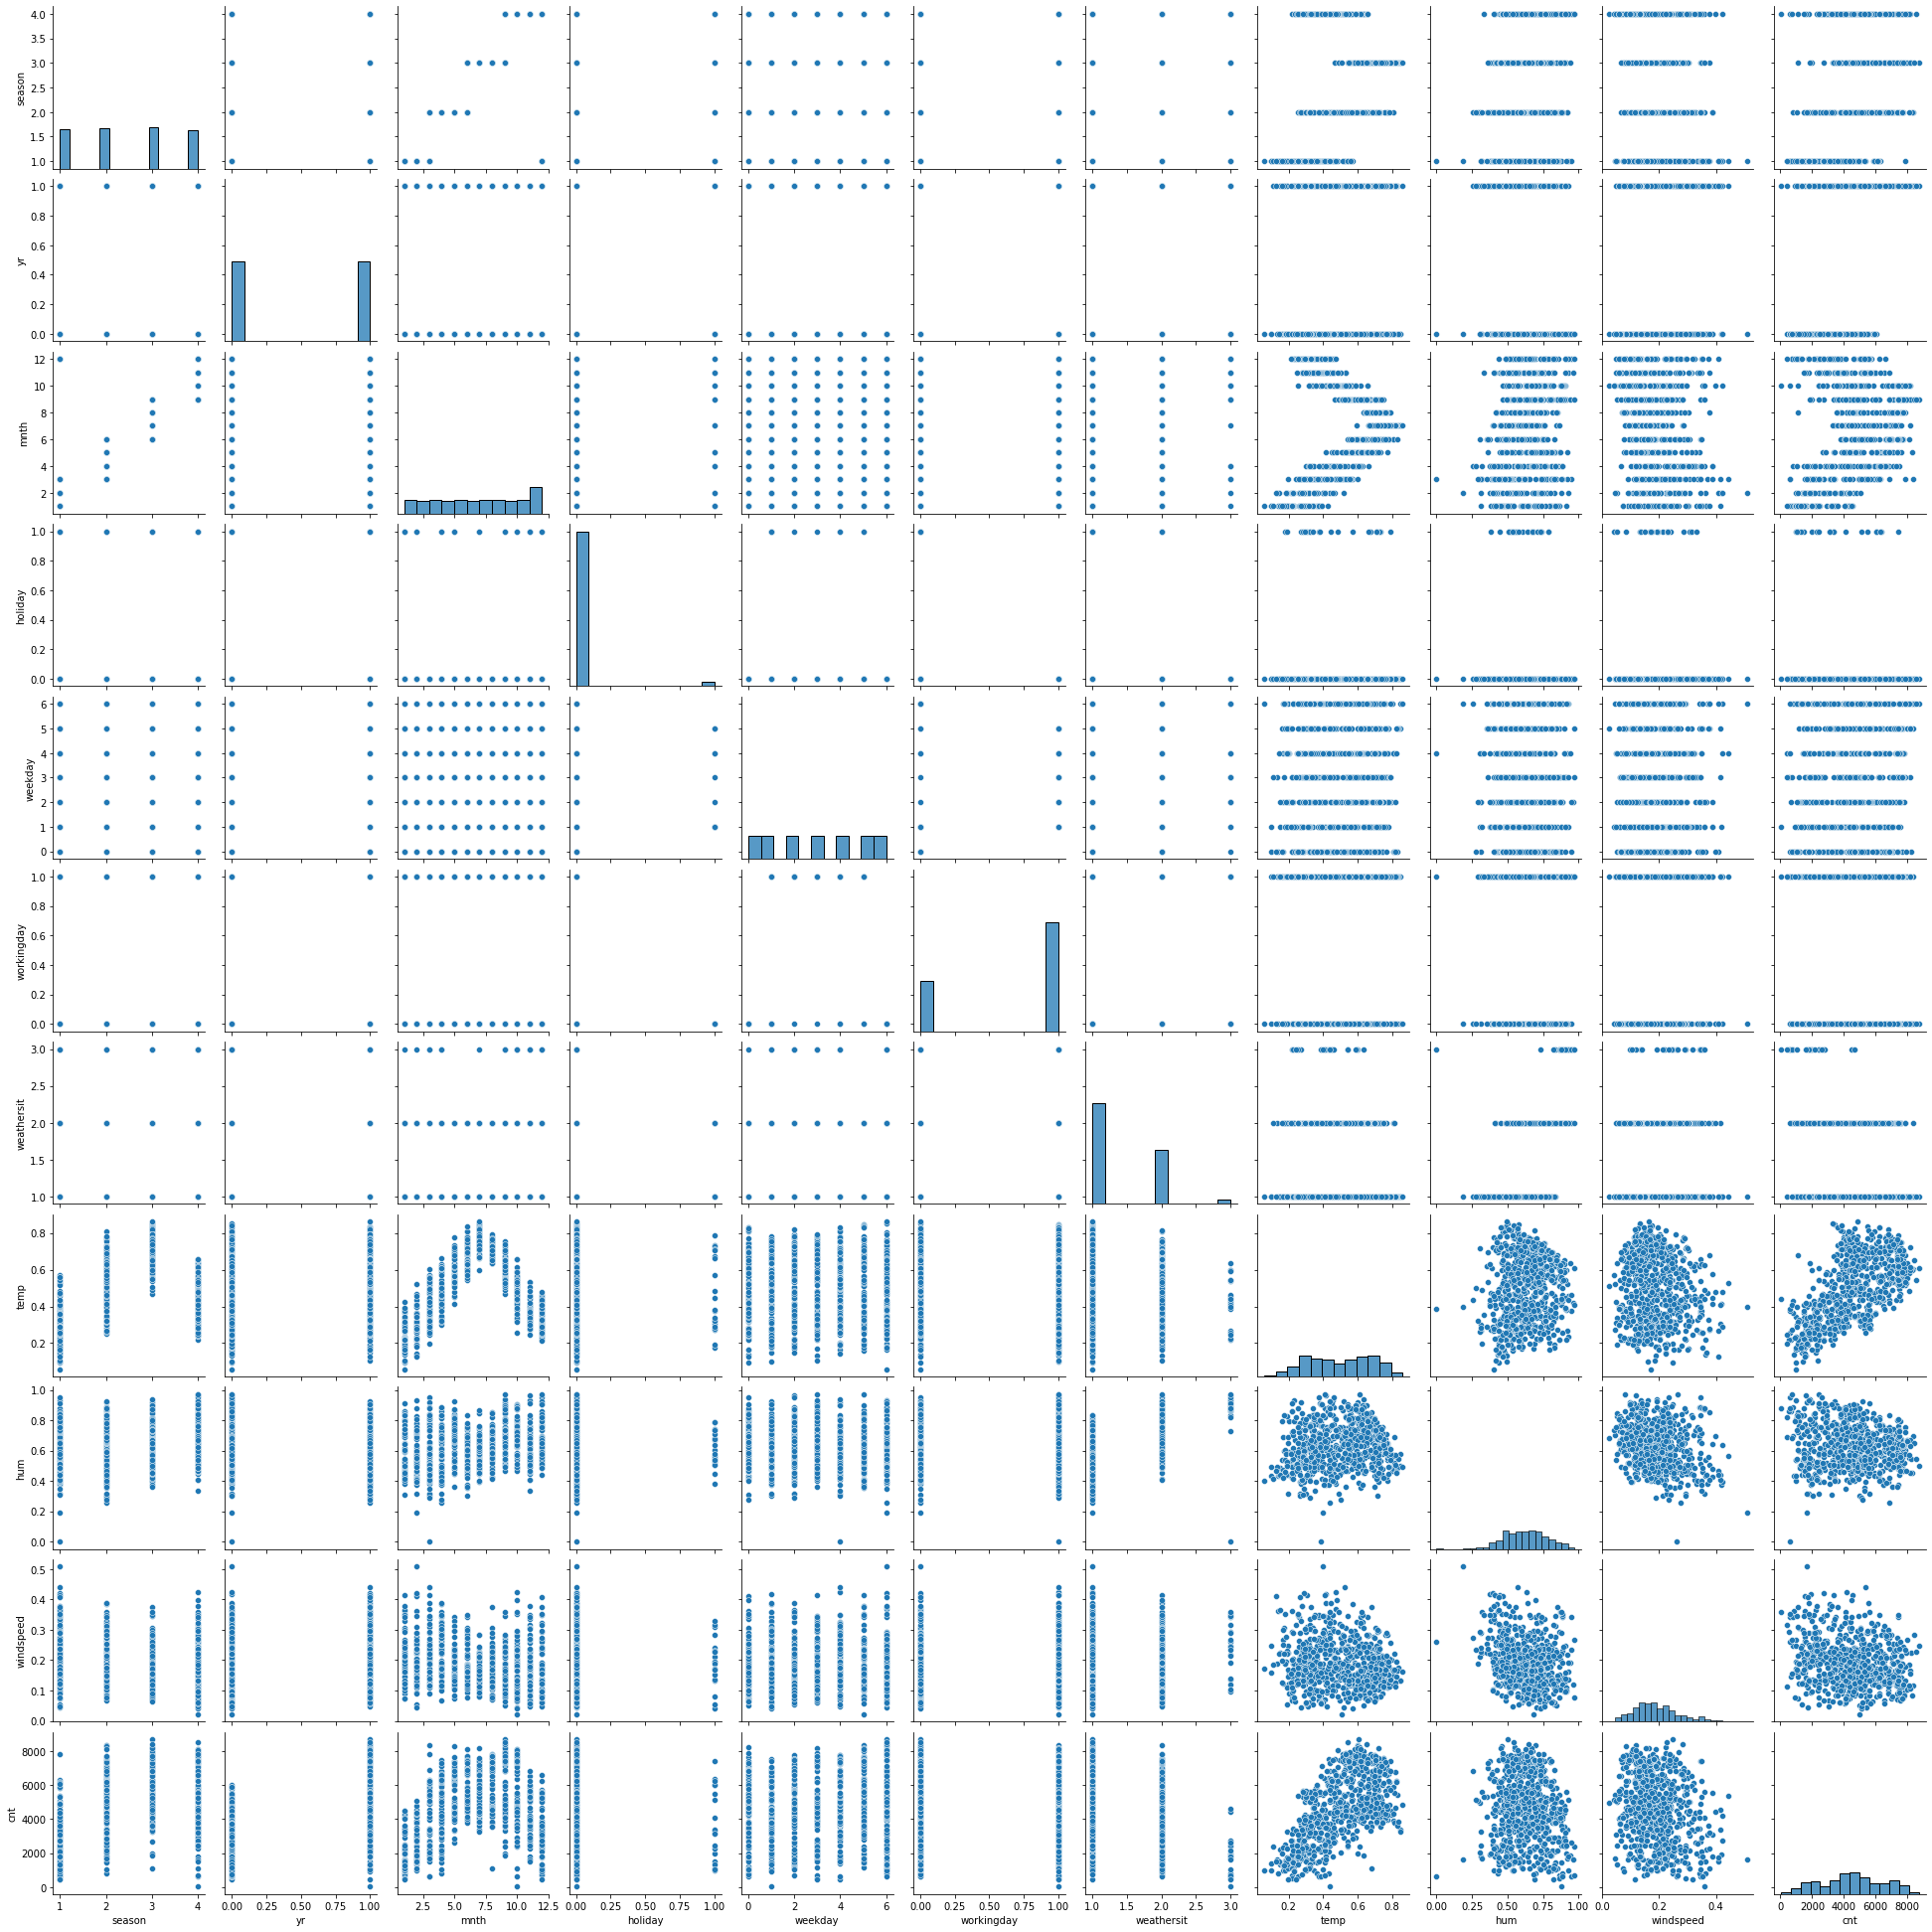

In [12]:
sns.pairplot(bike);

In [13]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]
X_numerical.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


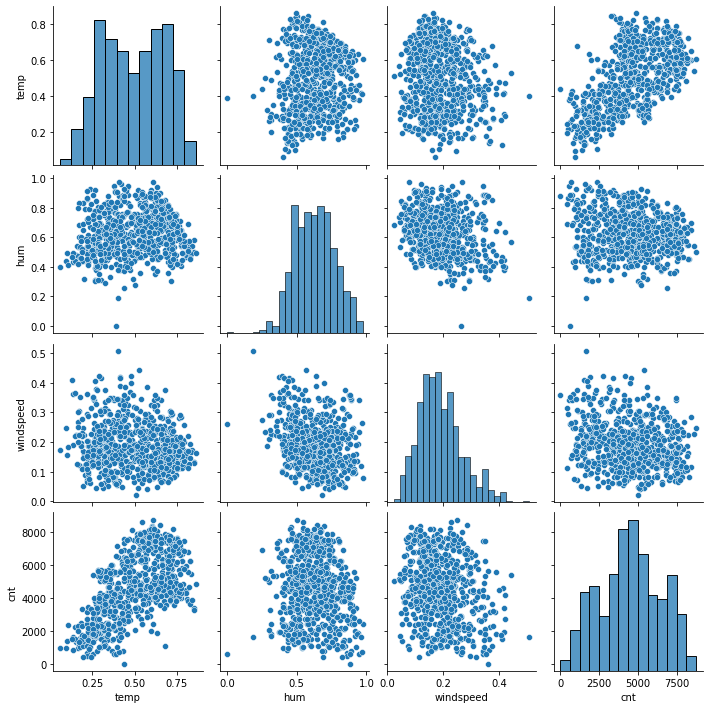

In [14]:
sns.pairplot(X_numerical);

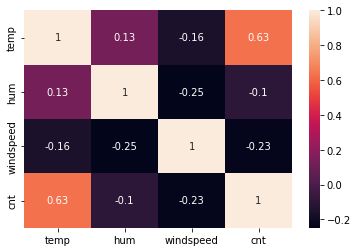

In [15]:
sns.heatmap(X_numerical.corr(), annot=True);

## Creating test and train dataset

In [16]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
X_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [17]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
X_cat = one_hot_encoder.fit_transform(X_cat).toarray()
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [18]:
X_cat.shape

(731, 32)

In [19]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [20]:
X_numerical = X_numerical.reset_index().drop(['dteday'], axis=1)
X_numerical.head()

,temp,hum,windspeed,cnt
0,0.344167,0.805833,0.160446,985
1,0.363478,0.696087,0.248539,801
2,0.196364,0.437273,0.248309,1349
3,0.200000,0.590435,0.160296,1562
4,0.226957,0.436957,0.186900,1600


In [21]:
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [22]:
X = X_all.iloc[:, :-1].values
y = X_all.iloc[:, -1].values.reshape((len(X_all), 1))
X.shape, y.shape

((731, 35), (731, 1))

In [23]:
# Normalize the output
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 35), (147, 35), (584, 1), (147, 1))

## Build and train the model

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[35,]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mse'])

2022-07-07 13:25:35.955475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-07 13:25:35.960267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-07 13:25:35.960674: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-07 13:25:35.961386: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4608      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 37,761
Trainable params: 37,761
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_hist = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
15/15 [==============================] - 1s 8ms/step - loss: 0.0967 - mse: 0.0967 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4/200
 1/15 [=>............................] - ETA: 0s - loss: 0.0115 - mse: 0.0115

2022-07-07 13:25:37.242946: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


15/15 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 11/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041

## Evaluate the model

In [28]:
model_hist.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

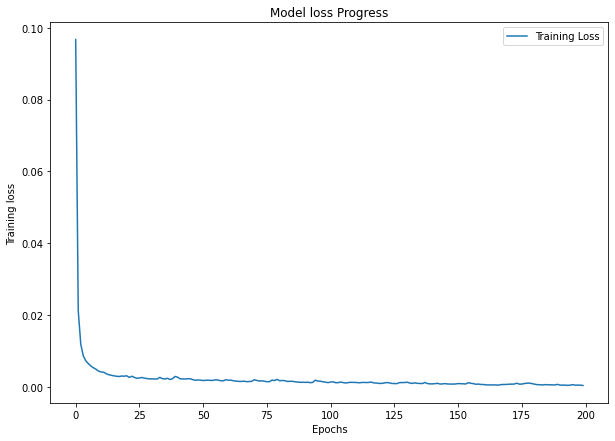

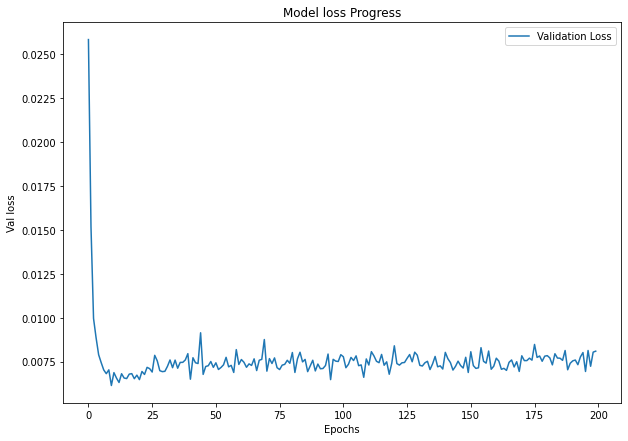

In [29]:
plt.figure(figsize=(10,7))
plt.plot(model_hist.history['loss'])
plt.title('Model loss Progress')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend(['Training Loss'])
plt.figure(figsize=(10, 7))
plt.plot(model_hist.history['val_loss'])
plt.title('Model loss Progress')
plt.xlabel('Epochs')
plt.ylabel('Val loss')
plt.legend(['Validation Loss']);

In [30]:
y_predict = model.predict(X_test)
y_comp = np.concatenate([y_test, y_predict], axis=-1)
y_comp[:10]

array([[0.06707317, 0.27925345],
       [0.74033594, 0.70128894],
       [0.26231017, 0.22742474],
       [0.41233318, 0.50870556],
       [0.62149103, 0.7625494 ],
       [0.41141279, 0.39515805],
       [0.59767602, 0.48938471],
       [0.43591809, 0.36905038],
       [0.78796595, 0.7151829 ],
       [0.41889093, 0.44933981]])

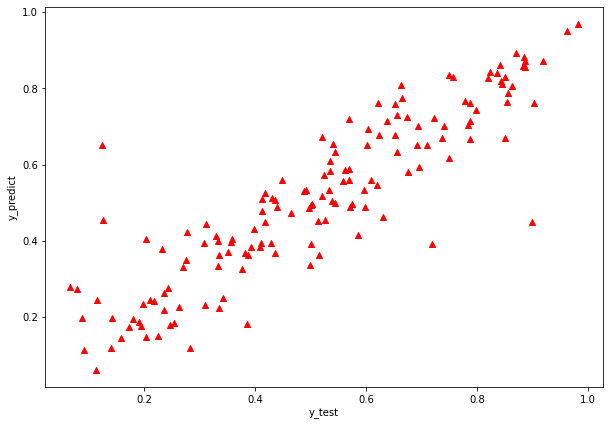

In [31]:
# Plot the predictions vs the ground truth values
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_predict, marker='^', color='r')
plt.xlabel('y_test')
plt.ylabel('y_predict');